In [1]:
# wget dataset: https://colab.research.google.com/github/Shaam93/Building-a-classifer-with-Pytorch/blob/master/Uploading_Data_to_Google_Colab.ipynb#scrollTo=z55wuhC_Lm6E
# untar dataset: https://colab.research.google.com/drive/14ZuNYfF_cKbyWeucM5SoNTu1Hj7DmqjB#scrollTo=AxKoHY4Lqjc3
# Delete superflous files: https://stackoverflow.com/questions/20994280/how-to-delete-every-files-extracted-after-extracting-and-doing-required-tasks

In [2]:
# DONT ATTACH GOOGLE DRIVE. IT MAKES EVERYTING SLOW.
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
#  download dataset from aistages using wget
!wget -cq https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000074/data/train.tar.gz

In [4]:
!ls

sample_data  train.tar.gz


In [5]:
import os

# define paths exactly same as Upstage server environment
TAR_PATH = "/content/train.tar.gz"
PARENT_DATA_PATH = "/content/input/"
DATA_PATH = os.path.join(PARENT_DATA_PATH, "data")

In [6]:
!mkdir $PARENT_DATA_PATH # make parent directory first
!mkdir $DATA_PATH # make child directory

In [7]:
from IPython.display import clear_output

!tar -xzvf $TAR_PATH -C $DATA_PATH
clear_output() # clear jupyter notebook output for memory saving purpose

In [8]:
import os
import glob
# remove superflous files such as "._xxxxx.jpg"

TRAIN_IMGS_DATASET_PATH = "/content/input/data/train/images"
EVAL_IMGS_DATASET_PATH = "/content/input/data/eval/images"

list_individuals = glob.glob(os.path.join(TRAIN_IMGS_DATASET_PATH, "*"))
print(len(list_individuals) ,list_individuals[:10])

2700 ['/content/input/data/train/images/005248_male_Asian_22', '/content/input/data/train/images/003718_female_Asian_60', '/content/input/data/train/images/001576_female_Asian_24', '/content/input/data/train/images/001646_female_Asian_22', '/content/input/data/train/images/004202_male_Asian_19', '/content/input/data/train/images/001393_male_Asian_24', '/content/input/data/train/images/001790_female_Asian_50', '/content/input/data/train/images/001130_male_Asian_23', '/content/input/data/train/images/003529_male_Asian_58', '/content/input/data/train/images/005484_female_Asian_56']


In [9]:
# superflous folders that start with ._ exist: it should be 2700 folders, not 5400
len(os.listdir(TRAIN_IMGS_DATASET_PATH))

5400

In [10]:
# remove superflous folders that start with ._
superflous_folders = glob.glob(os.path.join(TRAIN_IMGS_DATASET_PATH,"._*"))
print(len(superflous_folders),superflous_folders[:10])
for item in superflous_folders:
  os.remove(item)

2700 ['/content/input/data/train/images/._000600_female_Asian_52', '/content/input/data/train/images/._001382_female_Asian_60', '/content/input/data/train/images/._003179_female_Asian_19', '/content/input/data/train/images/._006563_male_Asian_20', '/content/input/data/train/images/._000519_female_Asian_56', '/content/input/data/train/images/._001191_male_Asian_25', '/content/input/data/train/images/._000295_female_Asian_56', '/content/input/data/train/images/._005552_female_Asian_35', '/content/input/data/train/images/._005436_female_Asian_52', '/content/input/data/train/images/._004433_female_Asian_23']


In [11]:
# superflous folders are removed, now it is 2700 folders
len(os.listdir(TRAIN_IMGS_DATASET_PATH))

2700

In [12]:
# check every files inside sample folder including hidden ._superflous-files using listdir
personal_id = "001771_female_Asian_54"
os.listdir(os.path.join(TRAIN_IMGS_DATASET_PATH, personal_id))

['._mask5.jpg',
 'mask1.jpg',
 'incorrect_mask.jpg',
 '._incorrect_mask.jpg',
 '._mask3.jpg',
 '._normal.jpg',
 'mask4.jpg',
 '._mask4.jpg',
 '._mask1.jpg',
 'mask2.jpg',
 'mask5.jpg',
 '._mask2.jpg',
 'normal.jpg',
 'mask3.jpg']

In [13]:
# remove ._xxxxx.jpg files
list_folders = glob.glob(os.path.join(TRAIN_IMGS_DATASET_PATH,"*"))
for folder in list_folders:
  superflous_files = glob.glob(os.path.join(folder,"._*"))
  for file in superflous_files:
    os.remove(file)

In [14]:
# check every files inside sample folder including hidden .files using listdir
personal_id = "001771_female_Asian_54"
os.listdir(os.path.join(TRAIN_IMGS_DATASET_PATH, personal_id))

['mask1.jpg',
 'incorrect_mask.jpg',
 'mask4.jpg',
 'mask2.jpg',
 'mask5.jpg',
 'normal.jpg',
 'mask3.jpg']

In [15]:
# check every files inside sample folder including hidden .files using listdir
personal_id = "003012_female_Asian_18"
os.listdir(os.path.join(TRAIN_IMGS_DATASET_PATH, personal_id))

['mask1.jpg',
 'incorrect_mask.jpg',
 'mask4.jpg',
 'mask2.jpg',
 'mask5.jpg',
 'normal.jpg',
 'mask3.jpg']

In [16]:
# check whether the dataset is untarred properly
for individual_name in list_individuals:
  individual_path = os.path.join(TRAIN_IMGS_DATASET_PATH, individual_name)
  
  # check whether dataset is properly untarred
  jpg_file_list = glob.glob(f"{individual_path}/*.jpg")
  jpeg_file_list = glob.glob(f"{individual_path}/*.jpeg")
  png_file_list = glob.glob(f"{individual_path}/*.png")
  list_images = jpg_file_list + jpeg_file_list + png_file_list
  num_jpg_images = len(list_images)
  # print(num_jpg_images)
  if num_jpg_images == 7:
    pass
  else:
    print(f"{individual_path} has a problem during untar process, only has {num_jpg_images} images")
    pass
print("process cleared, untarred properly")

process cleared, untarred properly


In [17]:
import os
import glob
# remove superflous files such as "._xxxxx.jpg" on evaluation dataset

superflous_files = glob.glob(os.path.join(EVAL_IMGS_DATASET_PATH,"._*"))
print(len(superflous_files),superflous_files[:10])
for item in superflous_files:
  os.remove(item)

12600 ['/content/input/data/eval/images/._8b305e24c5273949e9a0333af3f5fcd98ee8a116.jpg', '/content/input/data/eval/images/._6f0bb67905b7b3b69628451d5907c1bcdb5456f7.jpg', '/content/input/data/eval/images/._9533e5373db063aa118c81d9b00b957b14d06b10.jpg', '/content/input/data/eval/images/._05ffe06959b90f779a4f3accf55c5470c5a83409.jpg', '/content/input/data/eval/images/._db21baa3a3e7ebb925db89739738be956da02439.jpg', '/content/input/data/eval/images/._5e8503bf2c9e2e927488365c273713988fa4596f.jpg', '/content/input/data/eval/images/._4dcac0b5f5d6738697f6ca1911bbe6fcb0d1dbf9.jpg', '/content/input/data/eval/images/._004c55b70b841f47f61410e6305b88746539f537.jpg', '/content/input/data/eval/images/._7d9104c62ff41212e95749960e7f322cc18edc38.jpg', '/content/input/data/eval/images/._4615c02e4a53003ac4aa04ac74104425943d6b2b.jpg']


In [18]:
print(f"number of images: {len(os.listdir(EVAL_IMGS_DATASET_PATH))}")

number of images: 12600


In [19]:
# remove original .tar.gz file
!rm $TAR_PATH

### Crop face with retinaface

- [RetinaFace Pytorch](https://github.com/biubug6/Pytorch_Retinaface#installation)
- [Retinaface Library](https://github.com/serengil/retinaface)

In [20]:
# https://github.com/serengil/retinaface
!pip install retina-face

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9045 sha256=ebd11df967afab3ae39750bdd7935fe6360869f595ef6fb6510c7fa110945c7f
  Stored in directory: /root/.cache/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:03<00:00, 32.0MB/s]


(212, 158, 3)


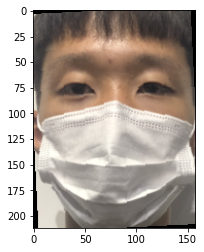

In [21]:
# crop face based on retinaface
from retinaface import RetinaFace
import matplotlib.pyplot as plt

faces = RetinaFace.extract_faces(img_path = list_images[1], align = True)

for face in faces:
  plt.imshow(face)
  print(face.shape)
  plt.show()

In [ ]:
# show location coordinates based on retinaface
location = RetinaFace.detect_faces(list_images[0])
location

In [ ]:
face_location = location["face_1"]["facial_area"]
face_location

## Crop with Retinaface in dataloader's transformation process

In [ ]:
!pip install -U albumentations

In [ ]:
from albumentations import *
import cv2

In [ ]:
# https://albumentations.ai/docs/api_reference/augmentations/crops/transforms/
augmentations.crops.transforms.Crop()

In [ ]:
def show_transform_al(image, title="Default"):
    plt.figure(figsize=(16,6))
    plt.suptitle(title, fontsize = 16)
    
    # Unnormalize 
    plt.imshow(image)
    plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

TRAIN_PATH = "/content/input/data/train"
TEST_PATH = "/content/input/data/eval"

df_train = pd.read_csv(os.path.join(TRAIN_PATH, "train.csv"))
df_test = pd.read_csv(os.path.join(TEST_PATH, "info.csv"))

In [ ]:
import os

# define train images and put image file paths in the list
train_image_paths = []
idx_ninety_percent = int(len(df_train["path"]) * 0.9)

for individual_id in df_train["path"][:idx_ninety_percent]:
  individual_path = os.path.join(TRAIN_IMGS_DATASET_PATH, individual_id)
  for file_name in os.listdir(individual_path):
    # don't append superflous files such as ._xxxxxxxxx.jpg
    if file_name.startswith("."):
      pass
    else:
      train_image_paths.append(os.path.join(individual_path, file_name))

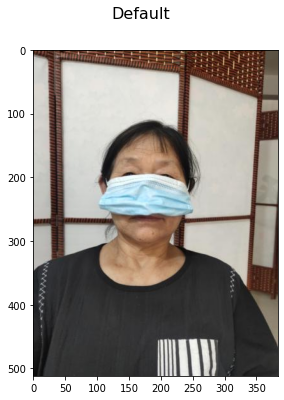

In [34]:
idx_image = 99
image_path = train_image_paths[idx_image]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
show_transform_al(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


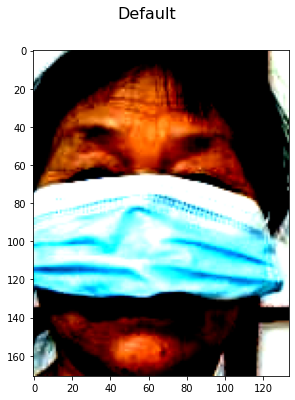

In [35]:
# crop face based on retinaface
from retinaface import RetinaFace
import matplotlib.pyplot as plt

face_location = RetinaFace.detect_faces(image_path)["face_1"]["facial_area"]

# define transformation
RGB_Mean = [0.56019358, 0.52410121, 0.501457]
RGB_SD = [0.23318603, 0.24300033, 0.24567522]

transform = Compose([
    Crop(
        x_min = face_location[0], 
        y_min = face_location[1], 
        x_max = face_location[2], 
        y_max = face_location[3]
        ),
    Normalize(mean=RGB_Mean, std=RGB_SD),
])


transformed_image = transform(image=image)["image"]
show_transform_al(transformed_image)

### Plot facial landmarks with retinaface

In [36]:
location = RetinaFace.detect_faces(image_path)
face_landmarks = location["face_1"]["landmarks"]
face_landmarks

{'left_eye': [210.85323, 200.12961],
 'mouth_left': [198.88353, 259.9152],
 'mouth_right': [155.13496, 257.033],
 'nose': [172.281, 220.88255],
 'right_eye': [151.89038, 196.16638]}

In [37]:
face_landmarks = location["face_1"]["landmarks"]
left_eye = face_landmarks["left_eye"]
right_eye = face_landmarks["right_eye"]
mouth_left = face_landmarks["mouth_left"]
mouth_right = face_landmarks["mouth_right"]
nose = face_landmarks["nose"]


In [46]:
list(face_landmarks.values())

[[151.89038, 196.16638],
 [210.85323, 200.12961],
 [172.281, 220.88255],
 [155.13496, 257.033],
 [198.88353, 259.9152]]

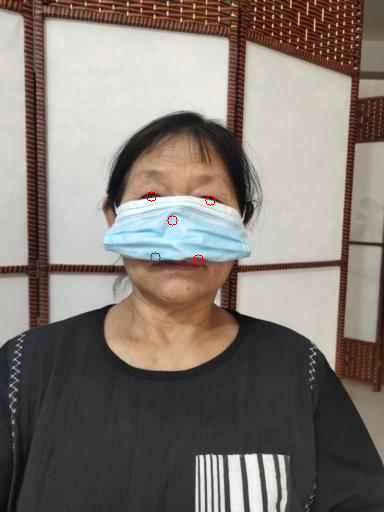

In [64]:
from google.colab.patches import cv2_imshow

idx_image = 99
image_path = train_image_paths[idx_image]
image = cv2.imread(image_path)

for x, y in list(face_landmarks.values()):
  cv2.circle(image, center=(x, y), radius=5, color=(0, 0, 255))

cv2_imshow(image)
